#### Q. Predict delivery time using sorting time 

### Importing libraries and reading the data.

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import skewnorm
from scipy.stats import norm


In [2]:
data = pd.read_csv(r"C:\Users\HP\Desktop\Python\Assignment\Simple Linear Regression\delivery_time.csv")

### EDA

In [3]:
data.head()  # Gives the first 5 rows of the table.

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info() # Gives the information about column header, null values and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.shape  # Gives the no. of rows and columns.

(21, 2)

In [6]:
data.describe()  # Gives the count, mean, std. deviation, min-max,25%-50%-75% quantile range

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Correlation Analysis

In [7]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


##### The correlation of variable with itself is 1 i.e.  Delivery Time with Delivery Time and Sorting Time with Sorting Time is 1. 
##### The correlation of Delivery Time with Sorting Time is 0.825997

### Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

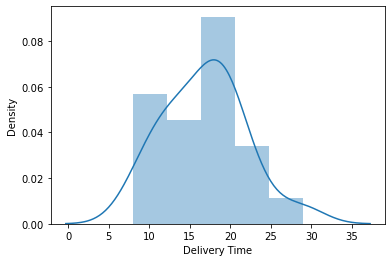

In [23]:
sns.distplot(data['Delivery Time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time'>

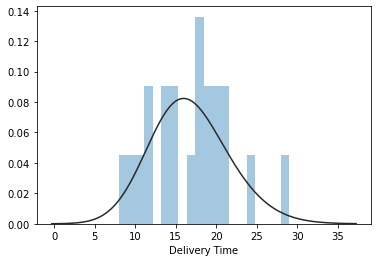

In [16]:
sns.distplot(data['Delivery Time'], fit=skewnorm, bins=20, kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

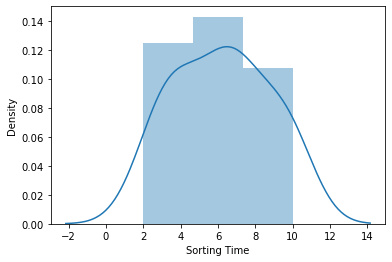

In [12]:

sns.distplot(data['Sorting Time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

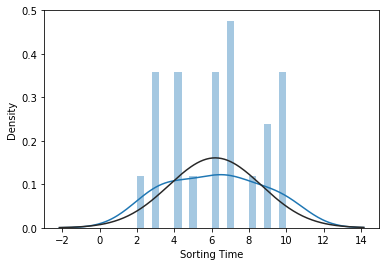

In [22]:
sns.distplot(data['Sorting Time'], fit=skewnorm, bins=20, kde=True)

### Feature Engineering

In [13]:
dataset=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [14]:
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Fitting a Linear Regression Model

In [15]:
import statsmodels.formula.api as smf

In [16]:
model = smf.ols("delivery_time~sorting_time",data = dataset).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

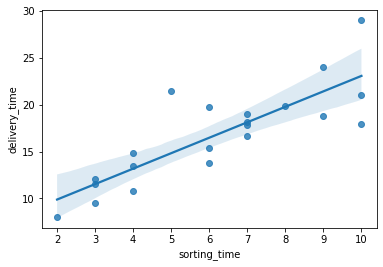

In [17]:
sns.regplot(x="sorting_time", y="delivery_time", data=dataset)

### Model Testing

In [18]:
#Coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [19]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [20]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Predict for new data point

In [21]:
# Manual prediction for say sorting time 6
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [22]:
# Automatic Prediction for say sorting time 6, 9
new_data=pd.Series([6,9])
new_data

0    6
1    9
dtype: int64

In [23]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,9


In [24]:

model.predict(data_pred)

0    16.476853
1    21.423913
dtype: float64